# Example 5 - Simple Circuit Approach

In [1]:
from CircuitCalculator.SimpleCircuit.styles.styling import select
select(style='DIN')
from CircuitCalculator.SimpleCircuit import Elements as sce
from CircuitCalculator.SimpleCircuit.DiagramTranslator import circuit_translator
from CircuitCalculator.Circuit.solution import symbolic_solution
import sympy as sp

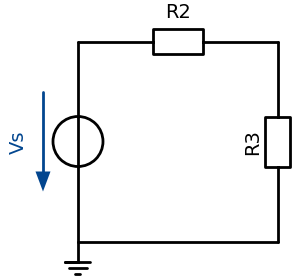

In [2]:
with sce.Schematic(unit=4) as schematic:
    schematic += sce.VoltageSource(name='Vs', reverse=True)
    schematic += sce.Resistor(name='R2').right()
    schematic += sce.Resistor(name='R3').down()
    schematic += sce.Line().left()
    schematic += sce.Ground()

In [3]:
solution = symbolic_solution(circuit=circuit_translator(schematic))
V2 = sp.simplify(solution.get_voltage('R2'))
sp.pprint(V2)

 R₂⋅Vs 
───────
R₂ + R₃
